In [1]:
import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

f = open("data/k1001.txt")
chset = f.read().splitlines()
print("loaded %d characters" % len(chset))

def get_random_ch():
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


In [2]:
WIDTH, HEIGHT = 120, 120
surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
ctx = cairo.Context (surface)
ctx.set_font_size(40)

# Generate 3 X 3 matrix
def generate_mat(target, font, weight="NORMAL"):
    if weight == "BOLD":
        weight = cairo.FONT_WEIGHT_BOLD
    else:
        weight = cairo.FONT_WEIGHT_NORMAL
        
    left_blank = random.choice([True, False])
    right_blank = random.choice([True, False])
    
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    ctx.set_source_rgb(0, 0, 0)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
            weight)
    ctx.move_to(0, 34)
    ctx.show_text(get_random_ch())
    ctx.move_to(40, 34)
    ctx.show_text(get_random_ch())
    ctx.move_to(80, 34)
    ctx.show_text(get_random_ch())
    if left_blank:
        ctx.move_to(-5, 74)
    else:
        ctx.move_to(5, 74)
    ctx.show_text(get_random_ch())
    ctx.move_to(40, 74)
    ctx.show_text(target)
    if right_blank:
        ctx.move_to(85, 74)
    else:
        ctx.move_to(75, 74)
    ctx.show_text(get_random_ch())
    ctx.move_to(0, 114)
    ctx.show_text(get_random_ch())
    ctx.move_to(40, 114)
    ctx.show_text(get_random_ch())
    ctx.move_to(80, 114)
    ctx.show_text(get_random_ch())

    f = io.BytesIO()
    surface.write_to_png (f)
    mat = imread(f)
    return mat

# Slice a target character from 3 X 3 matrix
def slice_img(mat):
    x_offset = random.randrange(-3, 3)
    y_offset = random.randrange(-3, 3)
    scale_factor = random.randrange(40, 46)
    x_start = round(60 - scale_factor / 2) + x_offset
    x_end = round(60 + scale_factor / 2) + x_offset
    y_start = round(60 - scale_factor / 2) + y_offset
    y_end = round(60 + scale_factor / 2) + y_offset
    sliced = mat[y_start:y_end, x_start:x_end]
    return imresize(sliced, [32, 32, 3])

# Helper function to draw 3 X 3 plots
def draw_subplot(array, w, h):
    plt.figure(num=None, figsize=(3, 3), facecolor='w', edgecolor='k')
    for i in range(w*h):
        plt.subplot(w,h,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(array[i], interpolation='none')

print ("function loaded")

function loaded


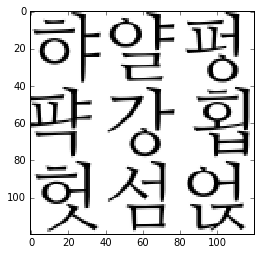

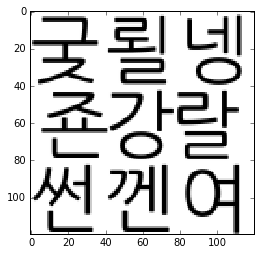

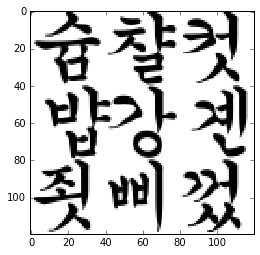

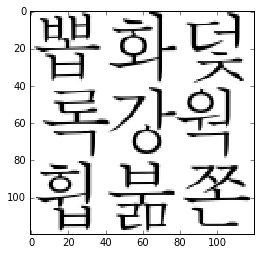

In [3]:
mat1 = generate_mat("강","NanumMyeongjo", "NORMAL")
mat2 = generate_mat("강","NanumGothic", "NORMAL")
mat3 = generate_mat("강","Gungsuh", "NORMAL")
mat4 = generate_mat("강","Batang", "NORMAL")

plt.figure()
plt.imshow(mat1, interpolation='none')

plt.figure()
plt.imshow(mat2, interpolation='none')

plt.figure()
plt.imshow(mat3, interpolation='none')

plt.figure()
plt.imshow(mat4, interpolation='none')

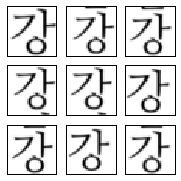

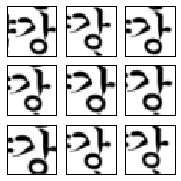

In [4]:
sliced = [slice_img(mat1) for i in range(9)]
draw_subplot(sliced, 3, 3)

sliced = [slice_img(mat3) for i in range(9)]
draw_subplot(sliced, 3, 3)